5.6540948 + 1.50586691·T₁((-1.10606061 + 0.01515152x)) -
3.83566583·T₂((-1.10606061 + 0.01515152x))
R-squared: 0.5996371036934556


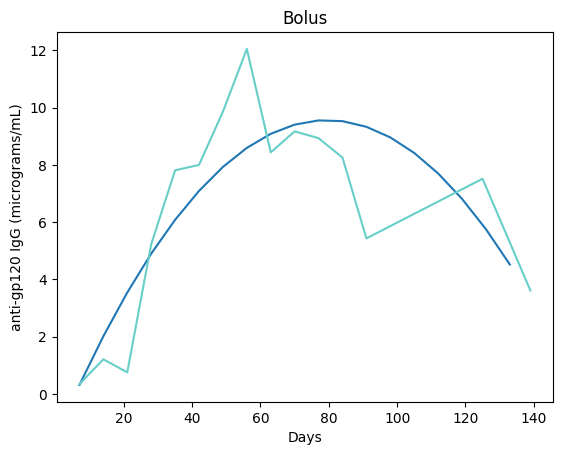

17.91143655 + 7.32159213·T₁((-1.16666667 + 0.02380952x)) -
16.68038854·T₂((-1.16666667 + 0.02380952x))
R-squared: 0.5653743050783862


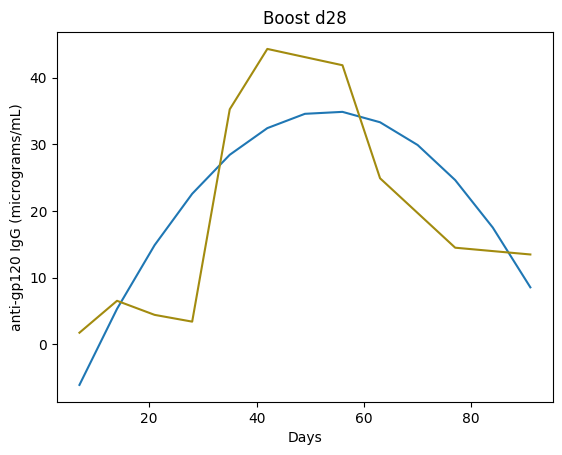

9.03106088 + 1.13844114·T₁((-1.10606061 + 0.01515152x)) -
6.4466921·T₂((-1.10606061 + 0.01515152x))
R-squared: 0.4480837452753743


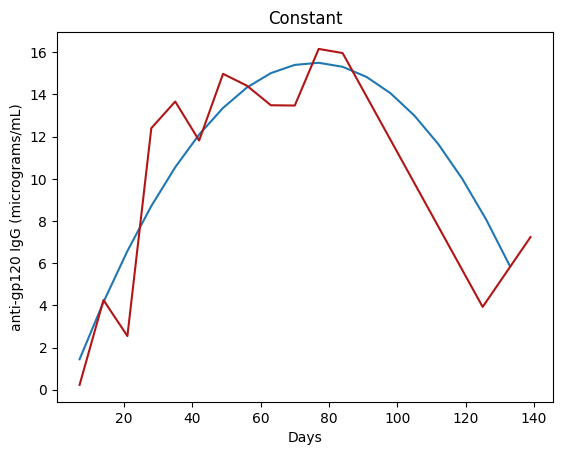

70.14995529 + 91.63243788·T₁((-1.28571429 + 0.04081633x)) +
29.06890601·T₂((-1.28571429 + 0.04081633x))
R-squared: 0.8296986706570773


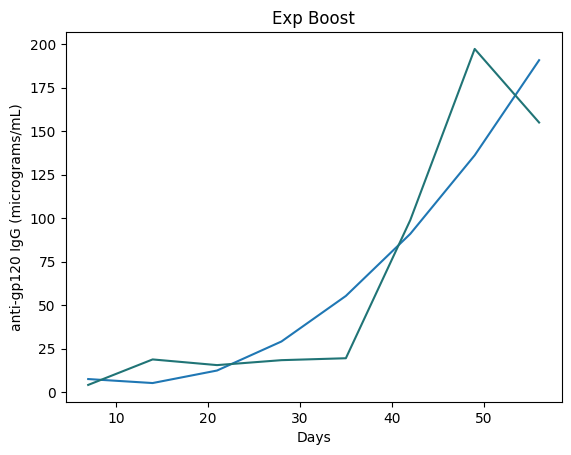

97.6558985 + 39.49497709·T₁((-1.16666667 + 0.02380952x)) -
70.52641558·T₂((-1.16666667 + 0.02380952x))
R-squared: 0.6317053980600875


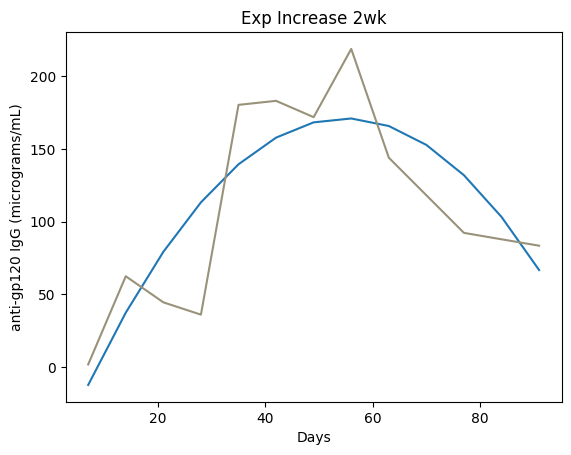

266.57093083 + 318.33390288·T₁((-1.28571429 + 0.04081633x)) +
42.74278468·T₂((-1.28571429 + 0.04081633x))
R-squared: 0.6116583027765643


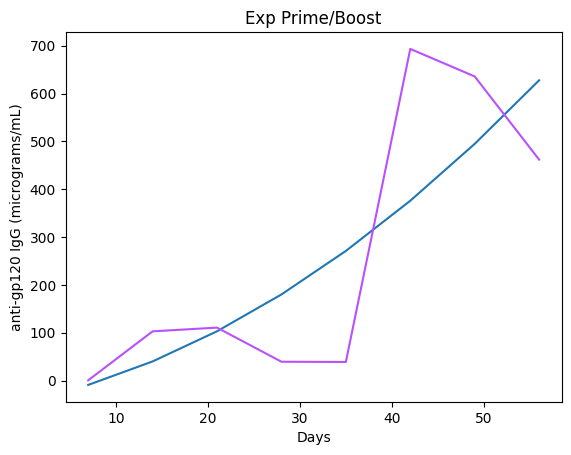

5.68393747 + 1.14773895·T₁((-1.10606061 + 0.01515152x)) -
4.11073452·T₂((-1.10606061 + 0.01515152x))
R-squared: 0.48876312080237816


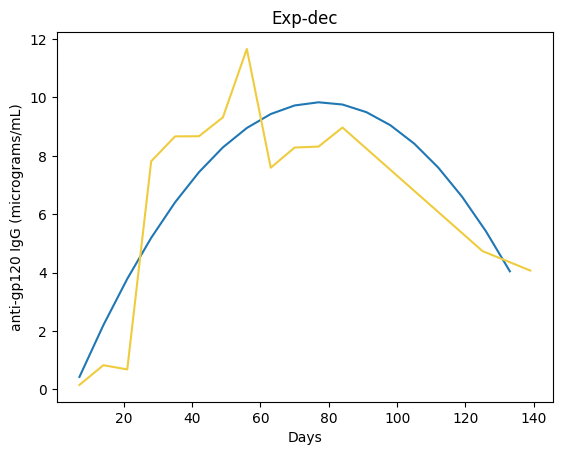

24.1100797 + 1.65627489·T₁((-1.10606061 + 0.01515152x)) -
18.74431615·T₂((-1.10606061 + 0.01515152x))
R-squared: 0.547087070214227


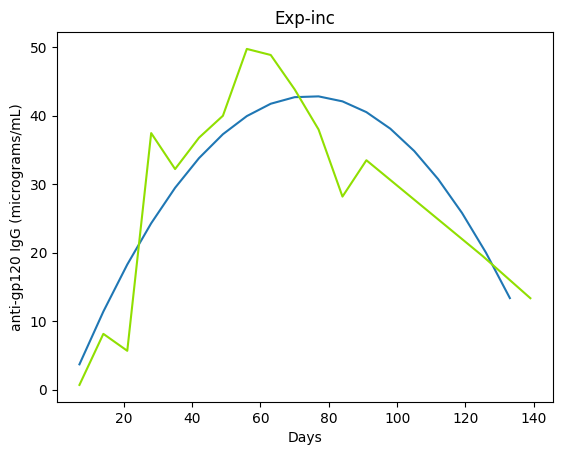

In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

data = pd.read_csv("2024-10-27 Tam 2016 Data.csv")
data = data.replace('-', np.nan)
data = data.replace("Exp Increase 1wk", "Exp-inc")
data["Binding"] = data["Binding"].astype("float32")
data["Time"] = data["Time"].transform(lambda x: int(x[3:]))
data = data.groupby(["Vaccine Scheme", "Time"])["Binding"].mean()

schemeAverages = {}
for index, value in data.items():
    if not schemeAverages.get(index[0], pd.Series()).empty:
        schemeAverages[index[0]][index[1]] = value
    else:
        schemeAverages[index[0]] = pd.Series(data=value, index=[index[1]])
for scheme, series in schemeAverages.items():
    plt.xlabel("Days")
    plt.ylabel("anti-gp120 IgG (micrograms/mL)")
    plt.title(scheme)

    regression = np.polynomial.Chebyshev.fit([x for x in series.keys()], [x for x in series],2)
    print(regression)
    regression_x = np.arange(series.keys()[0], series.keys()[-1]+1, 7)
    regression_y = regression(regression_x)  

    ymean = series.mean()
    rss = 0
    tss = 0
    for i, y in enumerate(series):
        rss+=math.pow(y-regression_y[i], 2)
        tss+=math.pow(y-ymean, 2)
    rsquared = 1 - (rss/tss)
    print("R-squared: "+str(rsquared))

    plt.plot(regression_x, regression_y)
    plt.plot(schemeAverages[scheme], color=(random.random(), random.random(), random.random()))
    plt.show()

In [2]:
print([(key, val) for key, val in schemeAverages.items()])


[('Bolus', 7       0.340099
14      1.206026
21      0.752426
28      5.221281
35      7.810296
42      7.998143
49      9.859259
56     12.050553
63      8.437202
70      9.170972
77      8.932960
84      8.255869
91      5.431434
125     7.515195
139     3.612494
dtype: float64), ('Boost d28', 7      1.743190
14     6.533272
21     4.421822
28     3.405784
35    35.273849
42    44.330509
49    43.102562
56    41.882793
63    24.919830
77    14.499850
91    13.484630
dtype: float64), ('Constant', 7       0.229903
14      4.251426
21      2.546766
28     12.399112
35     13.663043
42     11.814795
49     14.975340
56     14.412280
63     13.486397
70     13.472740
77     16.156342
84     15.961110
125     3.927966
139     7.236188
dtype: float64), ('Exp Boost', 7       4.213984
14     18.863876
21     15.602556
28     18.444946
35     19.550381
42     98.939575
49    197.329865
56    155.032852
dtype: float64), ('Exp Increase 2wk', 7       1.720199
14     62.359089
21     44.422699
28 

In [3]:
schemeAverages["Exp-inc"]

7       0.705539
14      8.157004
21      5.685416
28     37.457413
35     32.211460
42     36.787094
49     39.989189
56     49.742352
63     48.855911
70     43.838825
77     37.985340
84     28.192301
91     33.495975
125    19.528744
139    13.361705
dtype: float64

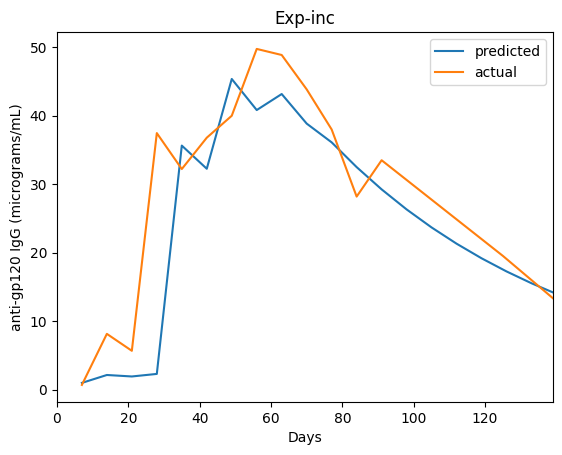

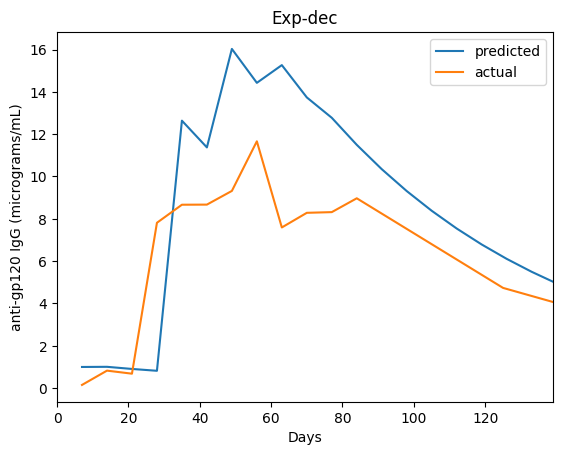

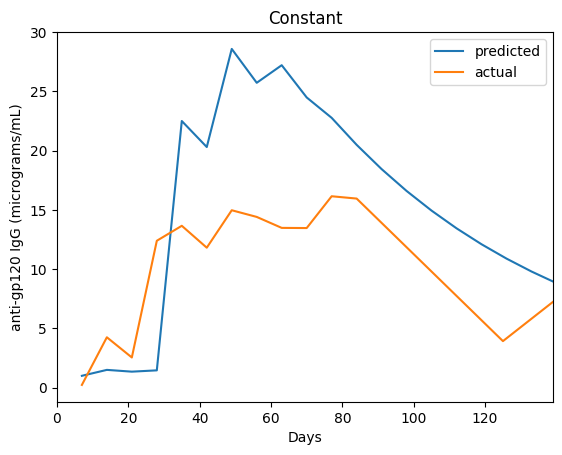

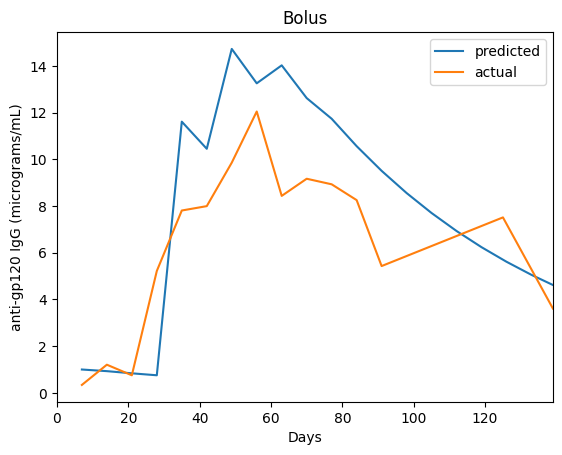

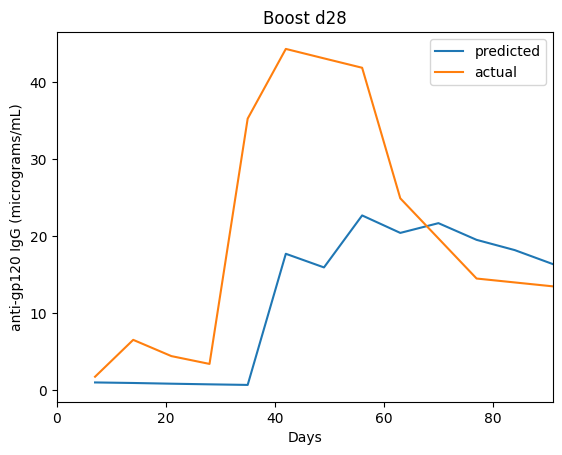

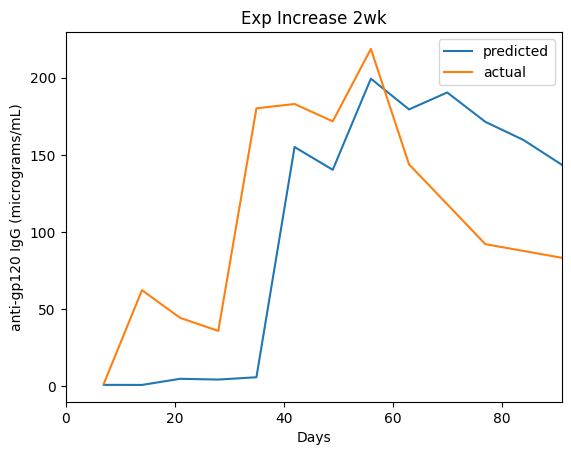

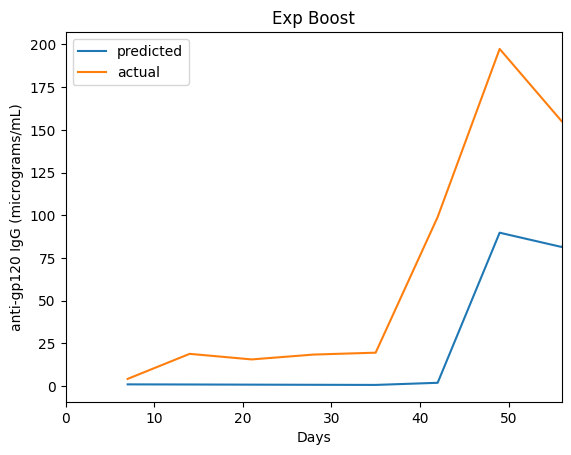

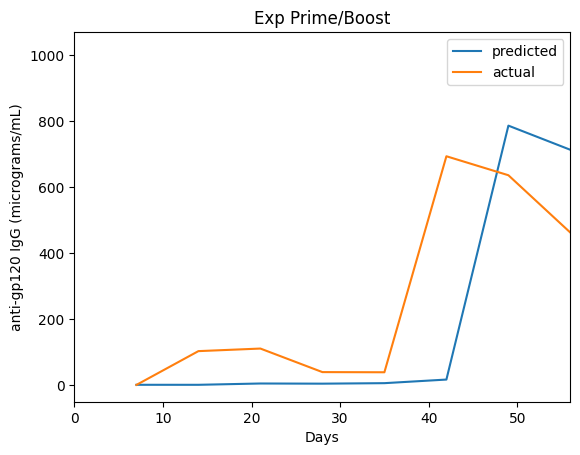

In [4]:
exp_inc_dosage = {0: 0.01, 1:0.026, 2:0.068, 3: 0.176, 4: 0.457, 5: 1.188, 6:3.089, 21: 5}
exp_dec_dosage = {0: 3.089, 1: 1.188, 2: 0.457, 3:0.176, 4:0.068, 5:0.026, 6:0.01, 21:5}
constant_dosage = {0: 0.714, 1: 0.714, 2: 0.714, 3: 0.714, 4: 0.714, 5: 0.714, 6: 0.714, 21: 5}
bolus21_dosage = {0: 5, 21: 5}
bolus28_dosage = {0: 5, 28: 5}
exp_inc_2wk_dosage = {0: 0.01, 2:0.026, 4:0.068, 6: 0.176, 8: 0.457, 10: 1.188, 12:3.089, 28: 5}
bolus_prime_exp_inc_boost_dosage = {0: 5, 28: 0.01, 30:0.026, 32:0.068, 34: 0.176, 36: 0.457, 38: 1.188, 40:3.089,}
exp_inc_prime_and_boost_dosage = {0: 0.01, 2:0.026, 4:0.068, 6: 0.176, 8: 0.457, 10: 1.188, 12:3.089, 28: 0.01, 30:0.026, 32:0.068, 34: 0.176, 36: 0.457, 38: 1.188, 40:3.089,}
dosages = {"Exp-inc": exp_inc_dosage, "Exp-dec":exp_dec_dosage, 
            "Constant": constant_dosage, "Bolus": bolus21_dosage, 
            "Boost d28": bolus28_dosage, "Exp Increase 2wk": exp_inc_2wk_dosage, 
            "Exp Boost":bolus_prime_exp_inc_boost_dosage, "Exp Prime/Boost": exp_inc_prime_and_boost_dosage}

def plot_dosages(dosage, concentrations):
    plt.plot(concentrations.keys(), concentrations.values(), label="predicted")
    plt.plot(schemeAverages[dosage], label="actual")
    ax = plt.gca()
    ax.set_xlim([0, max(schemeAverages[dosage].keys())])
    plt.xlabel("Days")
    plt.ylabel("anti-gp120 IgG (micrograms/mL)")
    plt.title(dosage)   
    plt.legend()
    plt.show()

def differential_eq(dosage, J, L, P):
    weights = [math.pow(x, 2) for x in range(1, 150)]
    concentrations = {7: 1}
    derivatives = {}
    for i in range(7, 140, 7):
        weighted_dosage = 0 
        for k in range(1, 8):
            weighted_dosage+=(dosages[dosage].get(i-k, 0)*weights[i-k])
        prevDerivative = 0
        if weighted_dosage==0:
            prevDerivative = P*derivatives.get(i-2*7,0) if derivatives.get(i-2*7,0)>0 else 0
        derivatives[i] = J*concentrations[i]*weighted_dosage - L*concentrations[i] + P*prevDerivative
        concentrations[i+7] = concentrations[i]+derivatives[i]
    return concentrations

for dosage in dosages.keys():
    concentrations = differential_eq(dosage, J=0.006, L=0.1, P=0.7)
    plot_dosages(dosage, concentrations)


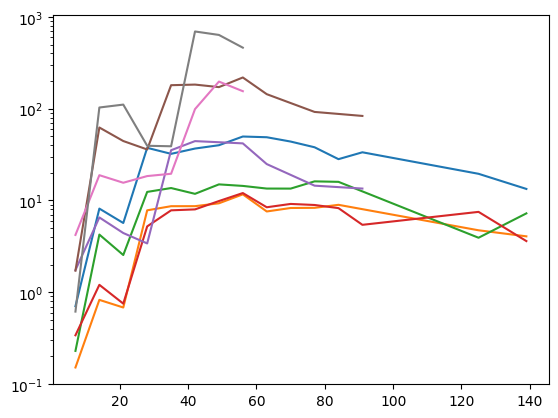

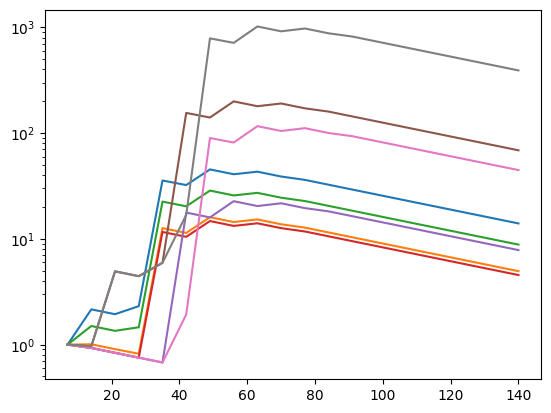

In [6]:
for dosage in dosages.keys():    
    ax = plt.gca()
    ax.set_yscale("log")
    plt.plot(schemeAverages[dosage], label=dosage)
plt.show()

for dosage in dosages.keys():
    ax = plt.gca()
    ax.set_yscale("log")
    concentrations = differential_eq(dosage, J=0.006, L=0.1, P=0.7)
    plt.plot(concentrations.keys(), concentrations.values(), label=dosage)
plt.show()


In [22]:
test_dosage1 = {0: 1.25, 1: 1.25, 2: 1.25, 3:25, 4:1.25, 5:1.25, 6:1.25, 21: 1.25}
test_dosage2 = {0: 0.714, 2:0.714, 4:0.714, 6: 0.714, 8: 0.714, 10: 0.714, 12:0.714, 28: 0.714, 30:0.714, 32:0.714, 34: 0.714, 36: 0.714, 38: 0.714, 40:0.714}
test_dosage3 = {0: 3.089, 2:1.188, 4:0.457, 6: 0.176, 8: 0.068, 10: 0.026, 12:0.01, 28: 3.089, 30:1.188, 32:0.457, 34: 0.176, 36: 0.068, 38: 0.026, 40:0.01}
test_dosage4 = {0: 2, 28: 8}

test_dosage5 = {0: 0.714, 1: 0.714, 2: 0.714, 3: 0.714, 4: 0.714, 5: 0.714, 6: 0.714, 7: 0.714, 8: 0.714, 9: 0.714, 10: 0.714, 11: 0.714, 12: 0.714, 13: 0.714, }
test_dosage6 = {0: 0.357, 1: 0.357, 2: 0.357, 3: 0.357, 4: 0.357, 5: 0.357, 6: 0.357, 7: 0.357, 8: 0.357, 9: 0.357, 10: 0.357, 11: 0.357, 12: 0.357, 13: 0.357, 14: 5 }

dosages = {"test1": test_dosage1, "test2": test_dosage2, "test3": test_dosage3, "test4": test_dosage4, "test5": test_dosage5, "test6": test_dosage6}

concentration_1 = differential_eq("test6", J=0.006, L=0.1, P=0.7)
print(concentration_1)


{7: 1, 14: 1.19988, 21: 3.3287670900000004, 28: 25.465068238500002, 35: 23.961716088750002, 42: 32.41233204264, 49: 29.171098838376004, 56: 30.394790771944503, 63: 27.355311694750053, 70: 25.219389572723614, 77: 22.697450615451253, 84: 20.427705553906126, 91: 18.38493499851551, 98: 16.54644149866396, 105: 14.891797348797564, 112: 13.402617613917807, 119: 12.062355852526025, 126: 10.856120267273422, 133: 9.77050824054608, 140: 8.793457416491473}


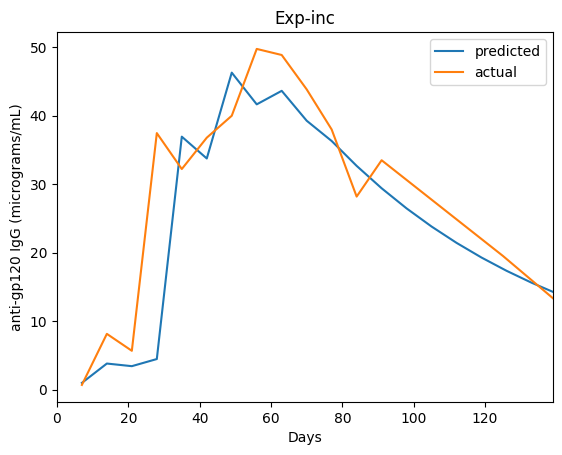

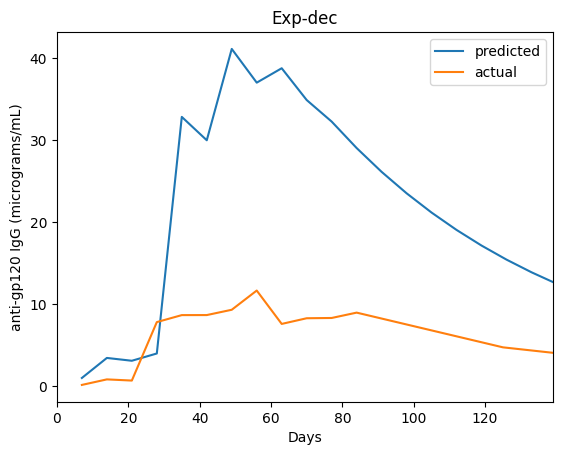

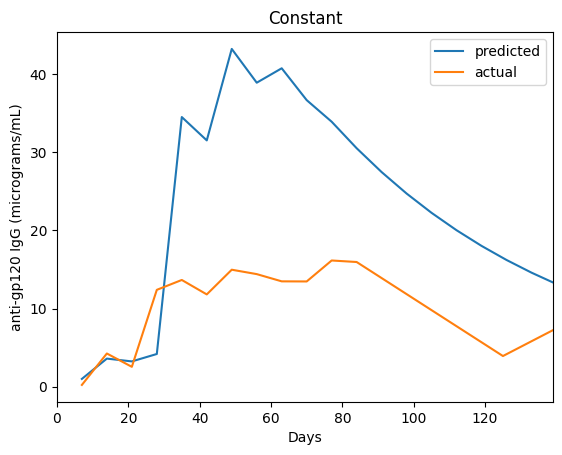

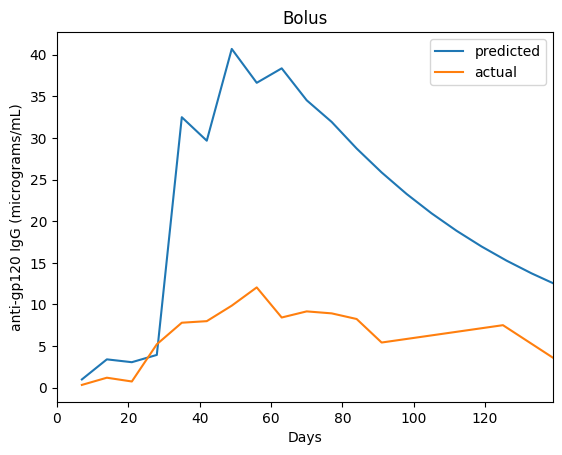

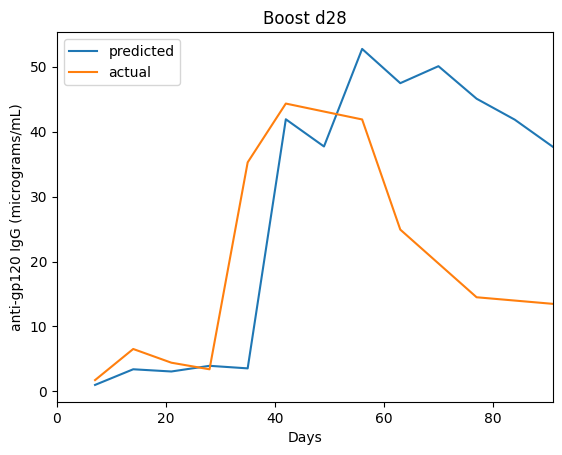

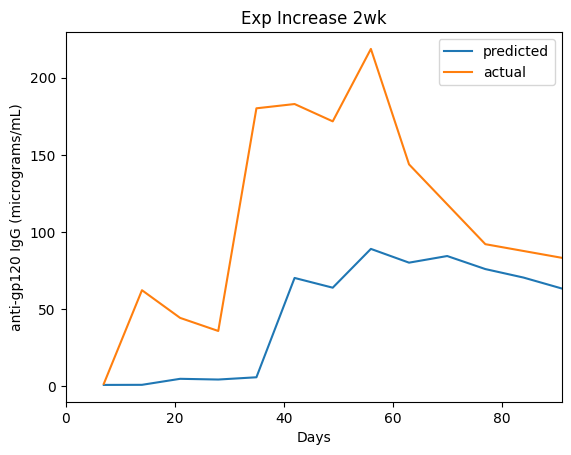

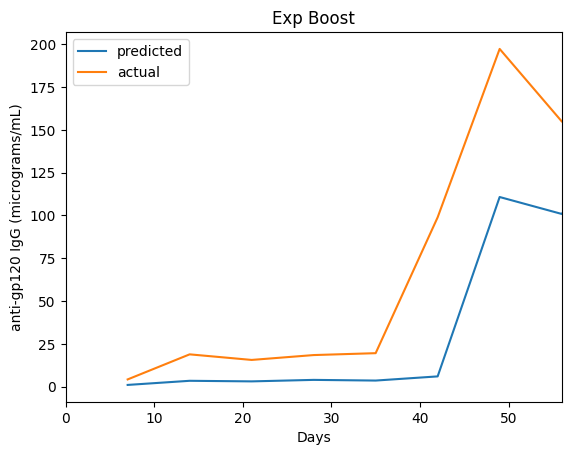

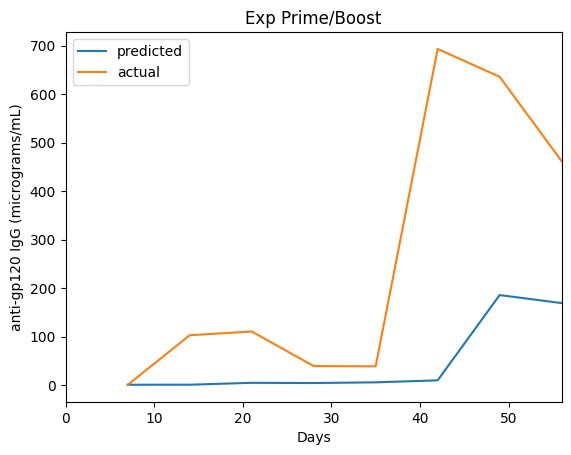

In [ ]:
#experimental work
def differential_eq_2(dosage, T, J, L, P):
    weights = [J*math.pow(x, 2) for x in range(1, 150)]
    concentrations = {7: 1}
    derivatives = {}
    for i in range(7, 140, 7):
        weighted_dosage = 0 
        for k in range(1, 8):
            weighted_dosage+=(dosages[dosage].get(i-k, 0)*weights[i-k])
        prevDerivative = 0
        if weighted_dosage==0:
            prevDerivative = P*derivatives.get(i-2*7,0) if derivatives.get(i-2*7,0)>0 else 0
        derivatives[i] = concentrations[i]*weighted_dosage - L*concentrations[i] + P*prevDerivative
        concentrations[i+7] = concentrations[i]+derivatives[i]
    plot_dosages(dosage, concentrations)

for dosage in dosages.keys():
    differential_eq_2(dosage, T=2, J=0.002, L=0.1, P=0.7)
